# Processing Database AR6

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px


## 1. Database with all countries

In [2]:
full_df = pd.read_csv('AR6_Scenarios_Database_ISO3_v1.1.csv')
df_capacity = full_df[(full_df['Variable']=='Capacity|Electricity|Solar') | (full_df['Variable']=='Capacity|Electricity|Wind') ]
# df_capacity.to_csv('ISO3_capacity_projections_AR6_scenarios.csv')
df_capacity = pd.read_csv('ISO3_capacity_projections_AR6_scenarios.csv')

In [197]:
# full_df = pd.read_csv('AR6_Scenarios_Database_R5_regions_v1.1.csv')
# df_energy = full_df[(full_df['Variable']=='Secondary Energy|Electricity|Solar|PV') | (full_df['Variable']=='Secondary Energy|Electricity|Wind|Onshore') ]
# df_energy.to_csv('R5_enr_projections_AR6_scenarios.csv')

On filtre pour avoir seulement les capacités de solaire.

In [8]:
df_to_plot = df_capacity[(df_capacity['Variable']=='Capacity|Electricity|Solar')]

Certains pays n'ont pas de données sur les capacités, c'est le cas de la Pologne :

In [9]:
df_to_plot[df_to_plot['Region']=='POL'].head()

,Unnamed: 0,Model,Scenario,Region,Variable,Unit,1990,1995,2000,2005,...,2070,2075,2080,2085,2090,2095,2100,2110,2130,2150
3886,766624,GENeSYS-MOD 2.9,Directed Transition 1.0,POL,Capacity|Electricity|Solar,GW,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3946,771108,GENeSYS-MOD 2.9,Gradual Development 1.0,POL,Capacity|Electricity|Solar,GW,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,775757,GENeSYS-MOD 2.9,Societal Commitment 1.0,POL,Capacity|Electricity|Solar,GW,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4065,780298,GENeSYS-MOD 2.9,Techno-Friendly 1.0,POL,Capacity|Electricity|Solar,GW,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10398,2553931,PyPSA-Eur-Sec 0.0.2,Baseline,POL,Capacity|Electricity|Solar,GW,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Voilà tous les modèles inclus dans la database : 

In [10]:
df_to_plot['Model'].drop_duplicates().to_list()

['AIM/CGE 2.2',
 'AIM/CGE-Korea 2.1',
 'AIM/Enduse-India 3.2',
 'AIM/Enduse-Japan 2.1',
 'AIM/Hub-China 2.2',
 'AIM/Hub-India 2.2',
 'AIM/Hub-Japan 2.1',
 'AIM/Hub-Korea 2.0',
 'AIM/Hub-Thailand 2.2',
 'AIM/Hub-Vietnam 2.2',
 'COFFEE 1.1',
 'DDPP Energy 1.0',
 'GCAM 5.2',
 'GCAM 5.3',
 'GCAM-Canada 4.2',
 'GCAM-KAIST 1.0',
 'GCAM-USA 4.2',
 'GCAM-USA 5.3',
 'GEM-E3_V2021',
 'GENeSYS-MOD 2.9',
 'GENeSYS-MOD-CHN 2.3',
 'GENeSYS-MOD-MEX 2.1',
 'IMACLIM 1.1',
 'IMACLIM-NLU 1.0',
 'IMAGE 3.0',
 'IMAGE 3.2',
 'IPAC-AIM/technology-China 1.0',
 'MARKAL-India 1.0',
 'MESSAGEix-GLOBIOM_1.0',
 'MESSAGEix-GLOBIOM_1.1',
 'PECE-China 2.0',
 'POLES ENGAGE',
 'POLES GECO2019',
 'PyPSA-Eur-Sec 0.0.2',
 'REMIND 2.1',
 'REMIND-Buildings 2.0',
 'REMIND-H13 2.1',
 'REMIND-MAgPIE 1.7-3.0',
 'REMIND-MAgPIE 2.0-4.1',
 'REMIND-MAgPIE 2.1-4.2',
 'REMIND-MAgPIE 2.1-4.3',
 'REMIND-Transport 2.1',
 'RU-TIMES 3.2',
 'TIAM-Grantham 3.2',
 'TIMES-China 2.0',
 'WEM 2020',
 'WITCH 5.0']

On crée des sous-dataset pour les capacités solaire et éolienne pour pouvoir évaluer la proportion de l'une par rapport à l'autre. On moyenne sur tous les scénarios disponibles pour avoir une seule valeur par pays.

In [11]:
df_solar = df_capacity[(df_capacity['Variable']=='Capacity|Electricity|Solar')]
df_wind = df_capacity[(df_capacity['Variable']=='Capacity|Electricity|Wind')]

In [12]:
stats_2100_solar = df_solar.groupby('Region')['2100'].agg(['mean', 'std']).reset_index().dropna()
stats_2100_wind = df_wind.groupby('Region')['2100'].agg(['mean', 'std']).reset_index().dropna()


Il n'y a pas autant de données disponibles pour le solaire et pour l'éolien...

In [13]:
stats_2100_solar

,Region,mean,std
0,ARG,93.340156,43.642565
1,AUS,125.414964,23.377363
6,BRA,199.271961,207.283619
7,CAN,206.977740,169.117587
9,CHN,3468.826399,2257.484238
10,COL,87.679537,21.393580
16,EU,1883.206580,1378.385893
23,IDN,414.175930,147.838161
24,IND,5342.995410,4184.901391
27,JPN,181.638211,64.010324


On fusionne les données sur les pays qui ont les deux valeurs et on calcule la répartition.

In [14]:
# stats_2100_wind = stats_2100_wind.drop(['Region'], axis = 1)
# Fusionner les deux DataFrames sur la colonne 'Region'
df = pd.merge(stats_2100_solar, stats_2100_wind, on='Region', suffixes=('_solar', '_wind'))

# df = df.drop(df.columns[0], axis = 1)
df['% solar'] = df.iloc[:,1]/(df.iloc[:,1]+df.iloc[:,3])
df['% wind'] = 1-df.iloc[:,1]/(df.iloc[:,1]+df.iloc[:,3])

On plot la répartition Solaire/Eolien dans les capacités installées en 2100.

<Axes: ylabel='Region'>

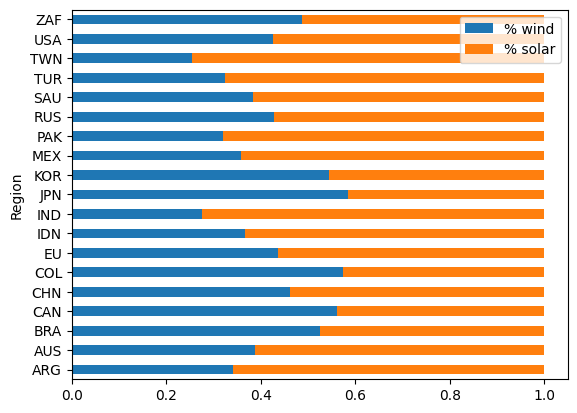

In [15]:
df[['Region','% wind','% solar']].set_index('Region').plot.barh(stacked=True)

On peut aussi plotter les résultats sur une carte.

In [16]:
# Créer la carte pour la capacité solaire
fig_solar = px.choropleth(
    df,
    locations="Region",
    locationmode='ISO-3',
    color="% solar",
    hover_name="Region",
    color_continuous_scale=px.colors.diverging.Portland,
    title="Proportion d'énergie solaire dans les ENRi"
)
fig_solar.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    coloraxis_colorbar=dict(
        title="%"
    )
)
fig_solar.show()

# Créer la carte pour la capacité éolienne
fig_wind = px.choropleth(
    df,
    locations="Region",
    locationmode='ISO-3',
    color="% wind",
    hover_name="Region",
    color_continuous_scale=px.colors.diverging.Portland,
    title="Proportion d'énergie éolienne dans les ENRi en 2100"
)
fig_wind.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    coloraxis_colorbar=dict(
        title="%"
    )
)
fig_wind.show()

# 2. Database régions R5

In [17]:
df_capacity = pd.read_csv('R5_capacity_projections_AR6_scenarios.csv')
df_solar = df_capacity[(df_capacity['Variable']=='Capacity|Electricity|Solar')]
df_wind = df_capacity[(df_capacity['Variable']=='Capacity|Electricity|Wind')]
stats_2100_solar = df_solar.groupby('Region')['2100'].agg(['mean', 'std']).reset_index().dropna()
stats_2100_wind = df_wind.groupby('Region')['2100'].agg(['mean', 'std']).reset_index().dropna()

In [18]:
df = pd.merge(stats_2100_solar, stats_2100_wind, on='Region', suffixes=('_solar', '_wind'))

# df = df.drop(df.columns[0], axis = 1)
df['% solar'] = df.iloc[:,1]/(df.iloc[:,1]+df.iloc[:,3])
df['% wind'] = 1-df.iloc[:,1]/(df.iloc[:,1]+df.iloc[:,3])

In [19]:
df

,Region,mean_solar,std_solar,mean_wind,std_wind,% solar,% wind
0,R5ASIA,11218.178368,10218.827027,5872.845134,3538.849755,0.656378,0.343622
1,R5LAM,1659.213193,1547.360267,1043.007334,748.103816,0.614018,0.385982
2,R5MAF,8191.168554,7722.517621,3903.490655,3048.344196,0.677255,0.322745
3,R5OECD90+EU,4836.417064,3580.581782,4070.193452,2776.634154,0.543014,0.456986
4,R5REF,898.455101,1100.996812,842.700307,1074.395469,0.516011,0.483989
5,R5ROWO,5120.437993,1341.878122,3357.633794,1159.605084,0.603963,0.396037


<Axes: ylabel='Region'>

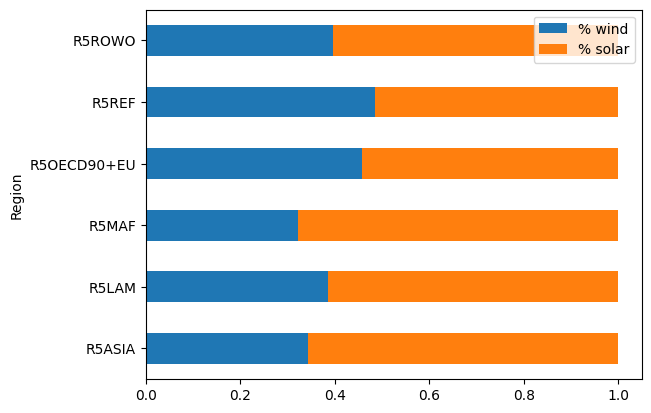

In [20]:
df[['Region','% wind','% solar']].set_index('Region').plot.barh(stacked=True)

# 2. Database régions R10

In [21]:
df_capacity = pd.read_csv('R10_capacity_projections_AR6_scenarios.csv')
df_solar = df_capacity[(df_capacity['Variable']=='Capacity|Electricity|Solar')]
df_wind = df_capacity[(df_capacity['Variable']=='Capacity|Electricity|Wind')]
stats_2100_solar = df_solar.groupby('Region')['2100'].agg(['mean', 'std']).reset_index().dropna()
stats_2100_wind = df_wind.groupby('Region')['2100'].agg(['mean', 'std']).reset_index().dropna()

In [22]:
df = pd.merge(stats_2100_solar, stats_2100_wind, on='Region', suffixes=('_solar', '_wind'))

# df = df.drop(df.columns[0], axis = 1)
df['% solar'] = df.iloc[:,1]/(df.iloc[:,1]+df.iloc[:,3])
df['% wind'] = 1-df.iloc[:,1]/(df.iloc[:,1]+df.iloc[:,3])

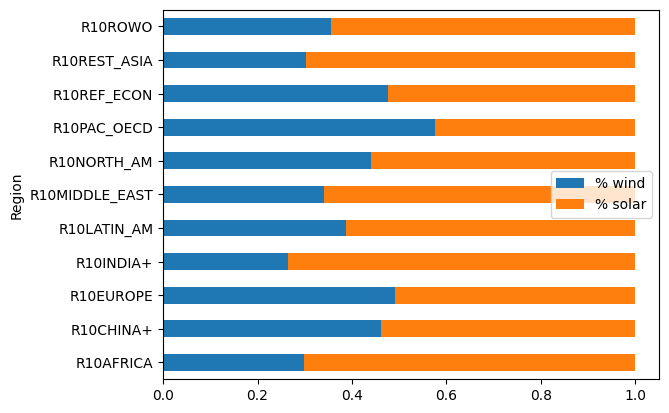

In [23]:
df[['Region','% wind','% solar']].set_index('Region').plot.barh(stacked=True)
df_pie = df[['Region','% wind','% solar']].set_index('Region')

# 4. Carte des régions

In [30]:
from netCDF4 import Dataset as NetCDFFile 
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr

In [31]:
file_path = "r10masks_fractional.nc"  # Replace with your file path
data = NetCDFFile(file_path)

In [32]:
data.variables

{'latitude': <class 'netCDF4._netCDF4.Variable'>
 float32 latitude(latitude)
     axis: Y
     units: degrees_north
     standard_name: latitude
     long_name: latitude
 unlimited dimensions: 
 current shape = (360,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'longitude': <class 'netCDF4._netCDF4.Variable'>
 float32 longitude(longitude)
     axis: X
     units: degrees_east
     standard_name: longitude
     long_name: longitude
 unlimited dimensions: 
 current shape = (720,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'region': <class 'netCDF4._netCDF4.Variable'>
 int16 region(region)
 unlimited dimensions: 
 current shape = (11,)
 filling on, default _FillValue of -32767 used,
 'r10_code': <class 'netCDF4._netCDF4.Variable'>
 float32 r10_code(region, latitude, longitude)
     description: 0=South-East Asia and developing Pacific. 1=Eurasia. 2=Asia-Pacific. 3=Africa. 4=Middle East. 5=Latin America and Caribbean. 6=North America. 7=Eastern Asia

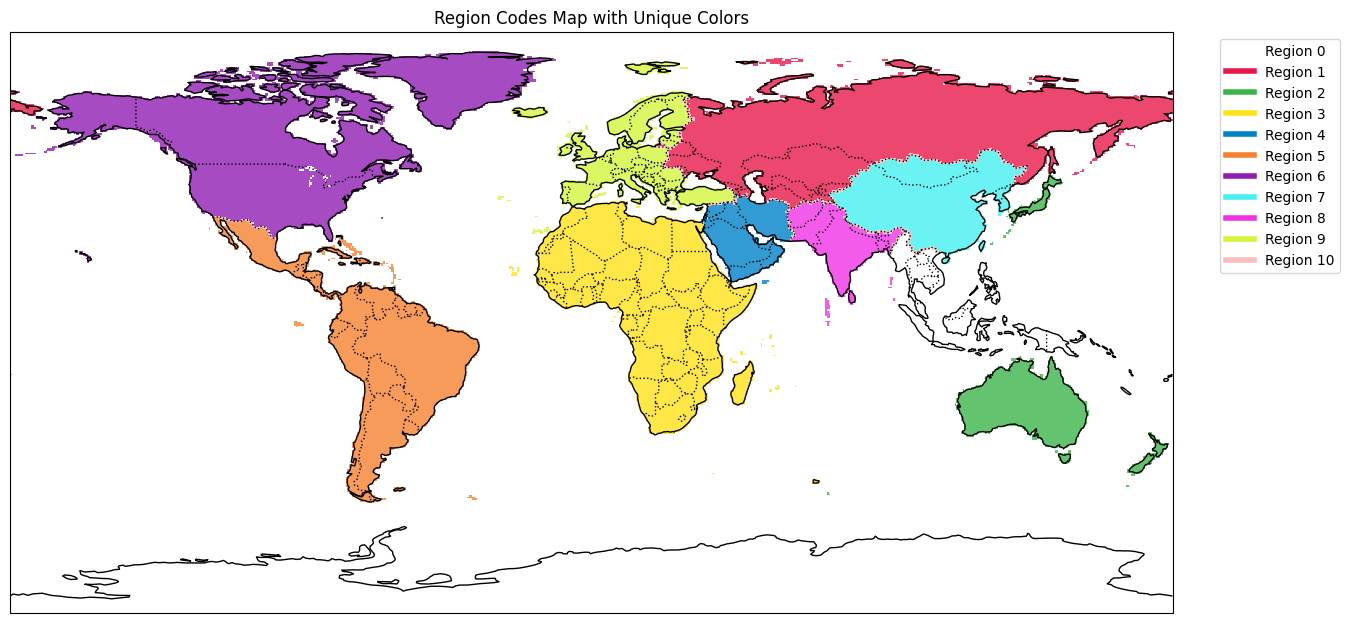

In [33]:
# Extract coordinates and data
lat = data.variables['latitude'][:]
lon = data.variables['longitude'][:]
r10_code = data.variables['r10_code'][:]

# Create a DataArray with appropriate coordinates and dimensions
r10_code_da = xr.DataArray(r10_code, coords=[range(r10_code.shape[0]), lat, lon], dims=["region", "latitude", "longitude"])

# Define a list of unique colors for each region
colors = ['#ffffff', '#e6194b', '#3cb44b', '#ffe119', '#0082c8', '#f58231', 
          '#911eb4', '#46f0f0', '#f032e6', '#d2f53c', '#fabebe', 
          '#008080', '#e6beff', '#aa6e28', '#fffac8', '#800000', 
          '#aaffc3', '#808000', '#ffd8b1', '#000080', '#808080', '#000000']
cmap = mcolors.ListedColormap(colors[:r10_code.shape[0]])

# Find the region with the max code
region_data = r10_code_da.argmax(dim='region')

# Plot the data
plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_global()

# Plot each region with a unique color
plot = ax.pcolormesh(lon, lat, region_data, transform=ccrs.PlateCarree(), cmap=cmap, alpha=0.8)

# Set the background color to white
ax.set_facecolor('white')

# Create a legend with colored patches
legend_patches = [plt.Line2D([0], [0], color=color, lw=4) for color in colors[:r10_code.shape[0]]]
ax.legend(legend_patches, [f'Region {i}' for i in range(r10_code.shape[0])], loc='upper right', bbox_to_anchor=(1.15, 1))

plt.title("Region Codes Map with Unique Colors")
plt.show()

In [34]:
region_names = df_pie.index.to_list()
region_names_dict = {'Region 0':'R10ROWO', 
                     'Region 1': 'R10REST_ASIA', 'Region 2': 'R10PAC_OECD', 'Region 3' : 'R10AFRICA', 'Region 4': 'R10MIDDLE_EAST', 
                     'Region 5': 'R10LATIN_AM', 'Region 6': 'R10NORTH_AM', 'Region 7':'R10CHINA+', 'Region 8':'R10INDIA+', 'Region 9':'R10EUROPE', 'Region 10': 'R10PAC_OECD'

}

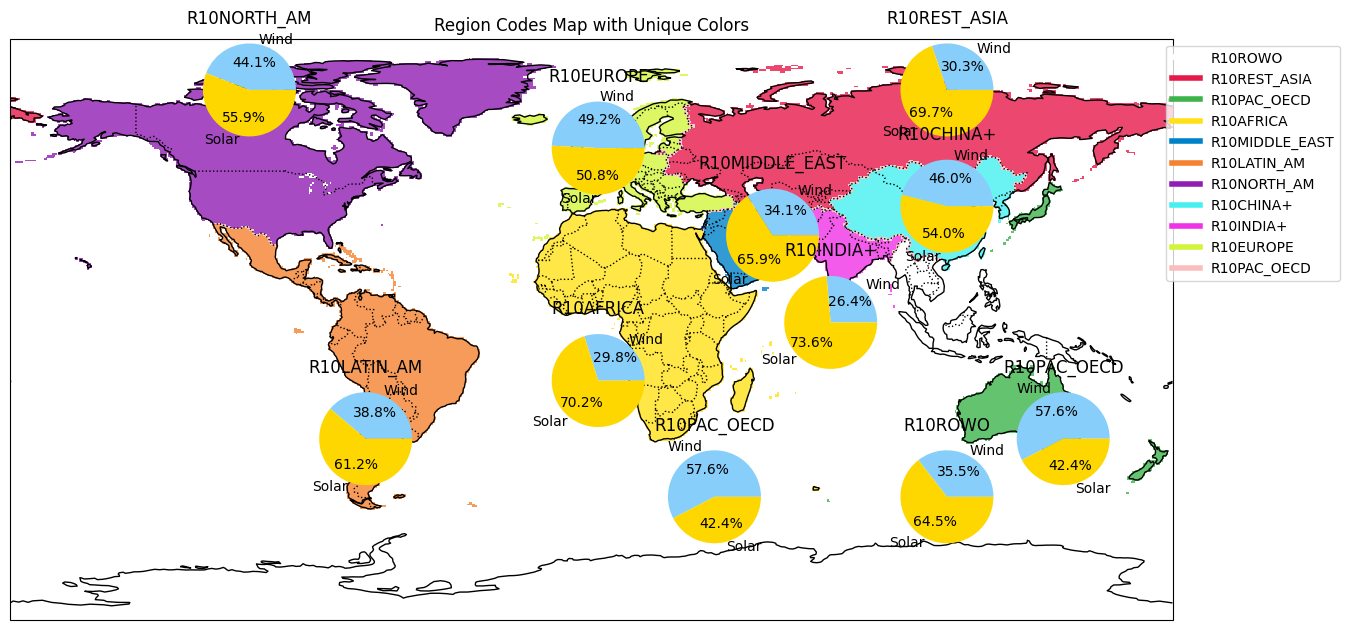

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Sample data for renewable energy shares (replace this with your actual data)
# Example data: renewable_share[i] = [solar, wind, hydro, other] for region i
renewable_share = np.random.rand(r10_code.shape[0], 4)  # Random data, replace with actual data
renewable_share = renewable_share / renewable_share.sum(axis=1, keepdims=True)  # Normalize to get percentages
renewable_share = df_pie
# Create a DataArray with appropriate coordinates and dimensions
r10_code_da = xr.DataArray(r10_code, coords=[range(r10_code.shape[0]), lat, lon], dims=["region", "latitude", "longitude"])

# Define a list of unique colors for each region
colors = ['#ffffff', '#e6194b', '#3cb44b', '#ffe119', '#0082c8', '#f58231', 
          '#911eb4', '#46f0f0', '#f032e6', '#d2f53c', '#fabebe', 
          '#008080', '#e6beff', '#aa6e28', '#fffac8', '#800000', 
          '#aaffc3', '#808000', '#ffd8b1', '#000080', '#808080', '#000000']
cmap = mcolors.ListedColormap(colors[:r10_code.shape[0]])

# Find the region with the max code
region_data = r10_code_da.argmax(dim='region')

# Plot the data
plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_global()



pie_positions = {
    0: {'lat': 0.1, 'lon': 0.7},  
    1: {'lat': 0.8, 'lon': 0.7},  # 1
    2: {'lat': 0.2, 'lon':0.8},   
    3: {'lat':0.3, 'lon': 0.4},  
    4: {'lat': 0.55, 'lon': 0.55},    
    5: {'lat': 0.2, 'lon': 0.2} ,  
    6: {'lat': 0.8, 'lon': 0.1}  ,  
    7: {'lat': 0.6, 'lon': 0.7}   ,
    8: {'lat': 0.4, 'lon': 0.6}   ,
     9: {'lat': 0.7, 'lon': 0.4}   ,
      10: {'lat': 0.1, 'lon':0.5}
}

# Plot each region with a unique color
plot = ax.pcolormesh(lon, lat, region_data, transform=ccrs.PlateCarree(), cmap=cmap, alpha=0.8)

# Set the background color to white
ax.set_facecolor('white')

# Create a legend with colored patches
legend_patches = [plt.Line2D([0], [0], color=color, lw=4) for color in colors[:r10_code.shape[0]]]
ax.legend(legend_patches, [region_names_dict[f'Region {i}'] for i in range(r10_code.shape[0])], loc='upper right', bbox_to_anchor=(1.15, 1))

plt.title("Region Codes Map with Unique Colors")

# Create pie charts for each region
for i in range(r10_code.shape[0]):
    region_mask = region_data.values == i
    # print(lon)
    lon_mean = pie_positions[i]['lon']
    lat_mean = pie_positions[i]['lat']
    # print(lon_mean, lat_mean)
    # lat_mean = 20
    # Create an inset for the pie chart
    ax_inset = inset_axes(ax, width="10%", height="10%", loc = 'lower left',bbox_to_anchor=(lon_mean,lat_mean, 2, 2), bbox_transform=ax.transAxes)
    region = region_names_dict[f'Region {i}']
    # Pie chart data for the region
    pie_data = renewable_share.loc[region, :]
    pie_labels = ['Wind', 'Solar']
    
    ax_inset.pie(pie_data, labels=pie_labels, autopct='%1.1f%%', colors=['lightskyblue', 'gold', 'lightcoral', 'lightgreen'])
    ax_inset.set_title(region)
    # Place the pie chart at the center of the region
    ax_inset.set_position([lon_mean, lat_mean, 5, 5])  # Adjust position as needed
    
    # print(region)

plt.show()





In [ ]:
import plotly.io as pio

# Load or prepare your data
# Assuming you have data loaded in variables 'lat', 'lon', and 'r10_code'

# Create a DataArray with appropriate coordinates and dimensions
r10_code_da = xr.DataArray(r10_code, coords=[range(r10_code.shape[0]), lat, lon], dims=["region", "latitude", "longitude"])

# Find the region with the max code
region_data = r10_code_da.argmax(dim='region')

# Flatten the latitude and longitude grids for plotting
lat_flat = np.repeat(lat, len(lon))
lon_flat = np.tile(lon, len(lat))
region_flat = region_data.values.flatten()

# Create the plot
fig = go.Figure()

# Plot all regions using a color scale
fig.add_trace(go.Scattermapbox(
    mode='markers',
    lon=lon_flat,
    lat=lat_flat,
    marker=dict(
        size=9,
        color=region_flat,
        colorscale='Viridis',  # Or any other colormap
        colorbar=dict(title='Region Codes')
    ),
    name='Regions'
))

# Update layout for the map
fig.update_layout(
    mapbox=dict(
        style="open-street-map",
        center=dict(lon=(lon.min() + lon.max()) / 2, lat=(lat.min() + lat.max()) / 2),
        zoom=3
    ),
    title="Region Codes Visualization"
)

# Use plotly.io to show the figure in a web browser
pio.write_html(fig, file='region_codes_map.html', auto_open=True)

In [55]:
# import matplotlib.pyplot as plt

# # Création du graphique
# fig, ax = plt.subplots(figsize=(10, 6))

# # Tracé des barres pour les moyennes
# ax.bar(stats_2100['Region'], stats_2100['mean'], yerr=stats_2100['std'], capsize=5, color='skyblue', alpha=0.7)

# # Ajout des titres et des labels
# ax.set_title('Capacité installée énergie solaire moyenne en 2100', fontsize=15)
# ax.set_xlabel('Région', fontsize=12)
# ax.set_ylabel('Capacité installée (GW)', fontsize=12)

# # Affichage de la grille
# ax.grid(True, linestyle='--', alpha=0.6)

# # Affichage du graphique
# plt.tight_layout()
# plt.show()

# 3. Filtrage par catégorie de scénario 

In [96]:
metadata = pd.read_excel('AR6_Scenarios_Database_metadata_indicators_v1.1_R10.xlsx', sheet_name = 'meta_Ch3vetted_withclimate')

In [208]:
# fonction pour récpérer les modèles d'une catégorie choisie
def get_models_category(category, metadata, data):
    metadata_cat = metadata[metadata['Category']==category]
    models_list = metadata_cat['Scenario'].to_list()
    # print(models_list)
    return data[data['Scenario'].isin(models_list)]

# fonction pour récupérer les dataframes de capacité ENR

def get_capacity_enr(df):
    df_solar = df[(df['Variable']=='Capacity|Electricity|Solar')]
    df_wind = df[(df['Variable']=='Capacity|Electricity|Wind')]
    return df_solar, df_wind

def get_energy_enr(df):
    df_solar = df[(df['Variable']=='Secondary Energy|Electricity|Solar|PV')]
    df_wind = df[(df['Variable']=='Secondary Energy|Electricity|Wind|Onshore')]
    return df_solar, df_wind

def stats_capacity(df, year):
    stats_enr = df.groupby('Region')[year].agg(['mean', 'std']).reset_index().dropna()
    return stats_enr

def box_plot_capacity(df, year,category, type = 'solar'):

    grouped = df.groupby('Region')[year].apply(list)

   # Plot
    plt.figure(figsize=(12, 8))
    plt.boxplot(grouped, patch_artist=True, labels=grouped.index)
    plt.ylabel('GW')
    plt.title(f'Projection capacity {type} in {year}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Show plot
    plt.show()

def box_plot_energy(df, year,category, type = 'solar'):

    grouped = df.groupby('Region')[year].apply(list)

   # Plot
    plt.figure(figsize=(12, 8))
    plt.boxplot(grouped, patch_artist=True, labels=grouped.index)
    plt.ylabel('PJ/yr')
    plt.title(f'Projection electricity {type} in {year}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Show plot
    plt.show()


def plot_evolution_capacity(df, category, type = 'solar'):
    df_to_plot = pd.DataFrame(index = pd.Index(df['Region'].drop_duplicates().to_list()), columns = [str(2030 + 10*i) for i in range(8)])
    # print(df['Region'].drop_duplicates().to_list())
    colors = [
    '#1f77b4',  # Blue
    '#ff7f0e',  # Orange
    '#2ca02c',  # Green
    '#d62728',  # Red
    '#9467bd',  # Purple
    '#8c564b',  # Brown
    '#e377c2',  # Pink
    '#7f7f7f',  # Gray
    '#bcbd22',  # Yellow-green
    '#17becf',   # Teal
    '#ff9896'   # Light Red
    ]
    i=0
    for region in df['Region'].drop_duplicates().to_list():
        # print(region)
        df_region = df[df['Region']==region]
        # print(df_region)
        
        for column in df_to_plot.columns: 
            # print(df_region[str(column)])
            df_to_plot.loc[region,str(column)] = df_region[str(column)].mean()
        plt.plot(df_to_plot.columns, df_to_plot.loc[region], label = region, color = colors[i])
        i+=1
    plt.legend()
    plt.title(f'Evolution of average projected capacity for {type} energy in {category} scenarios' )
    plt.ylabel('Capacity (GW)')
    plt.xlabel('Year')
    plt.show()
    return df_to_plot
        
        

In [209]:
category = 'C1'
df = get_models_category(category, metadata, df_capacity)
df_solar, df_wind = get_capacity_enr(df)
stats_2100_solar = stats_capacity(df_solar, '2100')
stats_2100_wind = stats_capacity(df_wind, '2100')

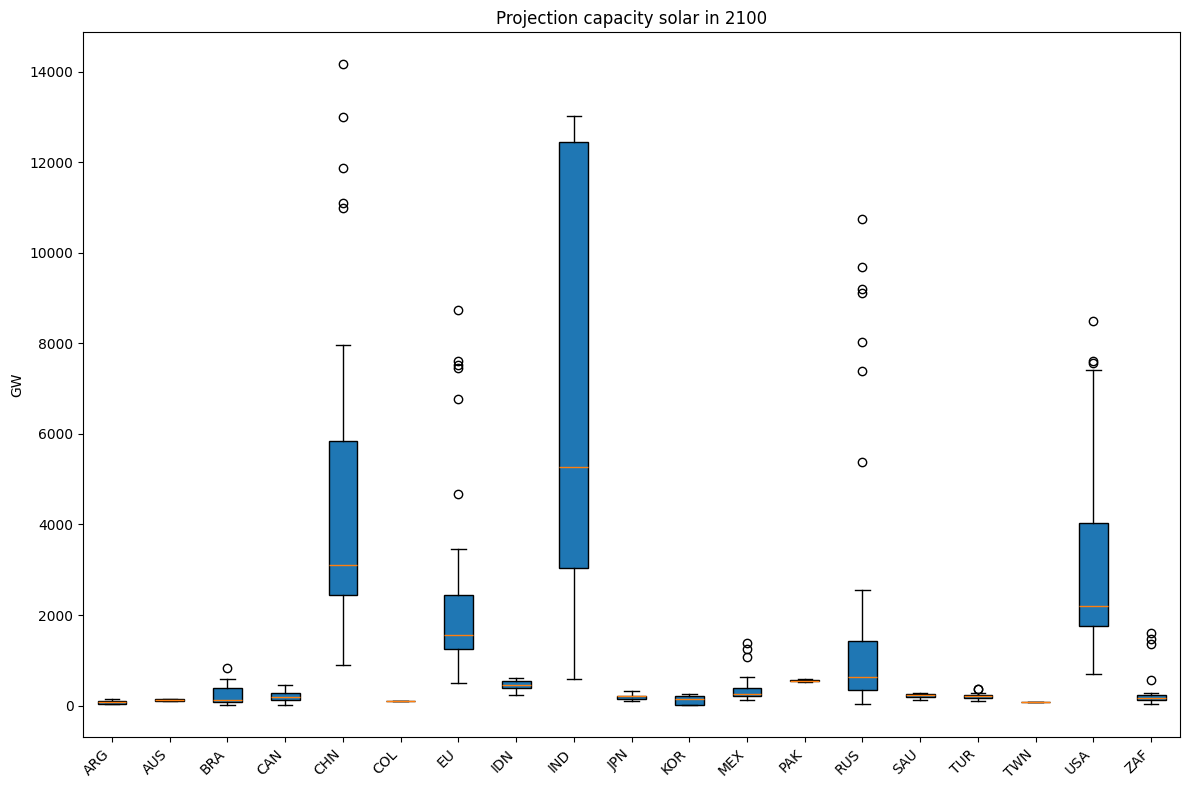

In [210]:
box_plot_capacity(df_solar,  '2100', category)

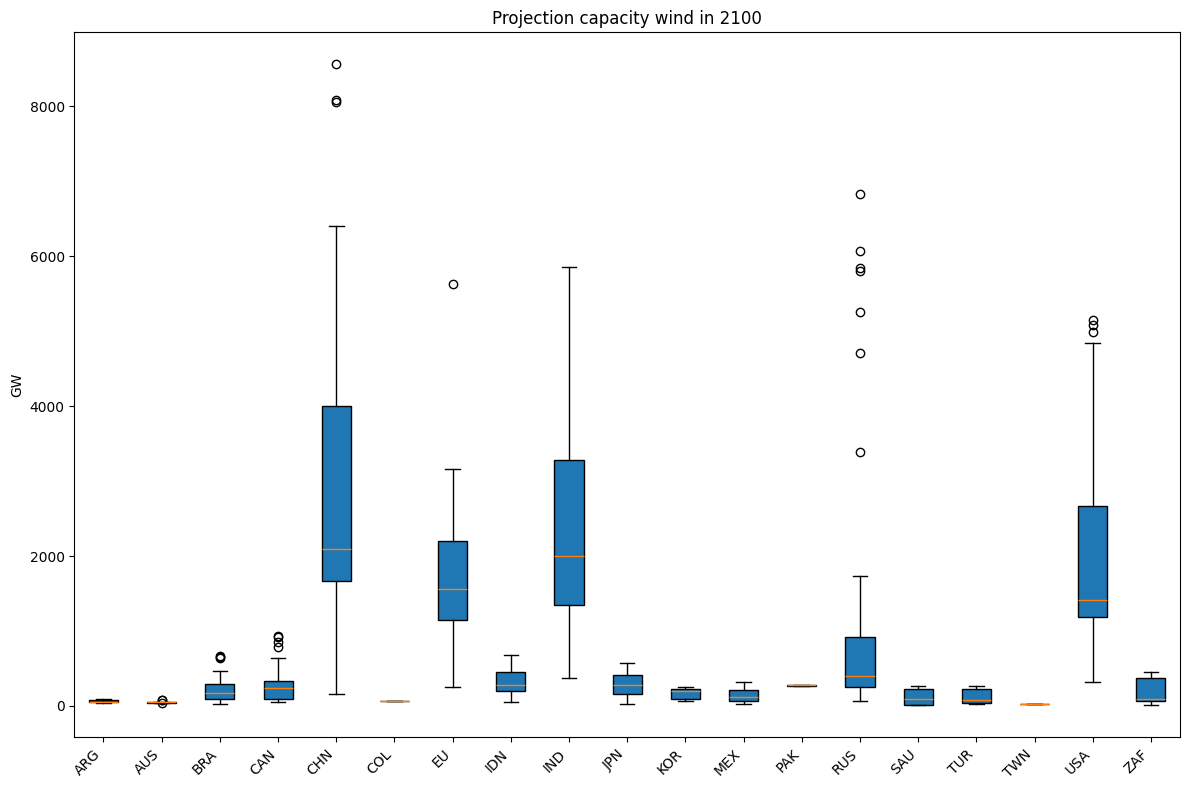

In [211]:
box_plot_capacity(df_wind, '2100', category, type = 'wind')

IndexError: list index out of range

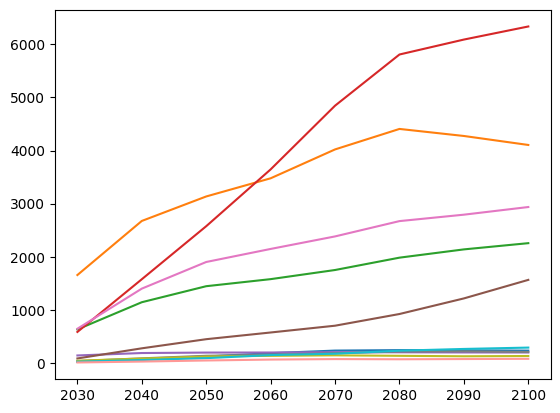

In [212]:
plot_evolution_capacity(df_solar, category, type = 'solar')
plot_evolution_capacity(df_wind, category, type = 'wind')

# 5. Statistiques électricité produite Wind/Solar

In [358]:
df_energy = pd.read_csv('ISO3_enr_projections_AR6_scenarios.csv')
category = 'C1'
df = get_models_category(category, metadata, df_energy)
df_solar, df_wind = get_energy_enr(df)
stats_2100_solar = stats_capacity(df_solar, '2100')
stats_2100_wind = stats_capacity(df_wind, '2100')

In [363]:
df_solar

,Unnamed: 0,Model,Scenario,Region,Variable,Unit,1990,1995,2000,2005,...,2070,2075,2080,2085,2090,2095,2100,2110,2130,2150
330,76956,AIM/CGE 2.2,EN_NPi2020_300f,BRA,Secondary Energy|Electricity|Solar|PV,EJ/yr,NaN,NaN,NaN,NaN,...,1.443200,1.485800,1.503200,1.508300,1.519200,1.558400,1.605100,NaN,NaN,NaN
332,77435,AIM/CGE 2.2,EN_NPi2020_300f,CHN,Secondary Energy|Electricity|Solar|PV,EJ/yr,NaN,NaN,NaN,NaN,...,31.048100,32.146000,32.965200,33.633500,34.242800,34.425800,34.464700,NaN,NaN,NaN
334,77939,AIM/CGE 2.2,EN_NPi2020_300f,EU,Secondary Energy|Electricity|Solar|PV,EJ/yr,NaN,NaN,NaN,NaN,...,9.276100,9.563100,9.638200,9.740500,9.872300,9.967200,10.117600,NaN,NaN,NaN
336,78424,AIM/CGE 2.2,EN_NPi2020_300f,IND,Secondary Energy|Electricity|Solar|PV,EJ/yr,NaN,NaN,NaN,NaN,...,19.491500,21.274700,22.771000,24.076400,25.239900,26.115500,26.686800,NaN,NaN,NaN
338,78894,AIM/CGE 2.2,EN_NPi2020_300f,JPN,Secondary Energy|Electricity|Solar|PV,EJ/yr,NaN,NaN,NaN,NaN,...,0.982200,0.982500,0.982600,0.982700,0.982800,0.982900,0.983000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17347,3868531,WITCH 5.0,EN_NPi2020_600,IDN,Secondary Energy|Electricity|Solar|PV,EJ/yr,NaN,NaN,NaN,NaN,...,2.077506,2.163690,2.294971,2.441246,2.713729,2.917403,3.078752,NaN,NaN,NaN
17349,3869026,WITCH 5.0,EN_NPi2020_600,IND,Secondary Energy|Electricity|Solar|PV,EJ/yr,NaN,NaN,NaN,NaN,...,6.541477,7.110760,7.632487,8.014609,8.284562,8.575204,8.853578,NaN,NaN,NaN
17351,3869518,WITCH 5.0,EN_NPi2020_600,MEX,Secondary Energy|Electricity|Solar|PV,EJ/yr,NaN,NaN,NaN,NaN,...,1.077361,1.129138,1.155528,1.188571,1.265300,1.329025,1.398257,NaN,NaN,NaN
17353,3870012,WITCH 5.0,EN_NPi2020_600,USA,Secondary Energy|Electricity|Solar|PV,EJ/yr,NaN,NaN,NaN,NaN,...,8.446026,8.807793,9.078424,9.295766,9.426461,9.567590,9.688759,NaN,NaN,NaN


In [359]:
stats_2100_solar

,Region,mean,std
0,ARG,0.324332,0.114676
1,AUS,0.331323,0.055202
2,BRA,1.330118,1.136997
3,CAN,0.819305,0.756625
4,CHN,17.986862,11.289644
5,COL,0.265650,0.199734
6,EU,10.076963,7.137591
7,IDN,2.003078,0.798497
8,IND,29.013857,16.302794
9,JPN,0.604098,0.238654


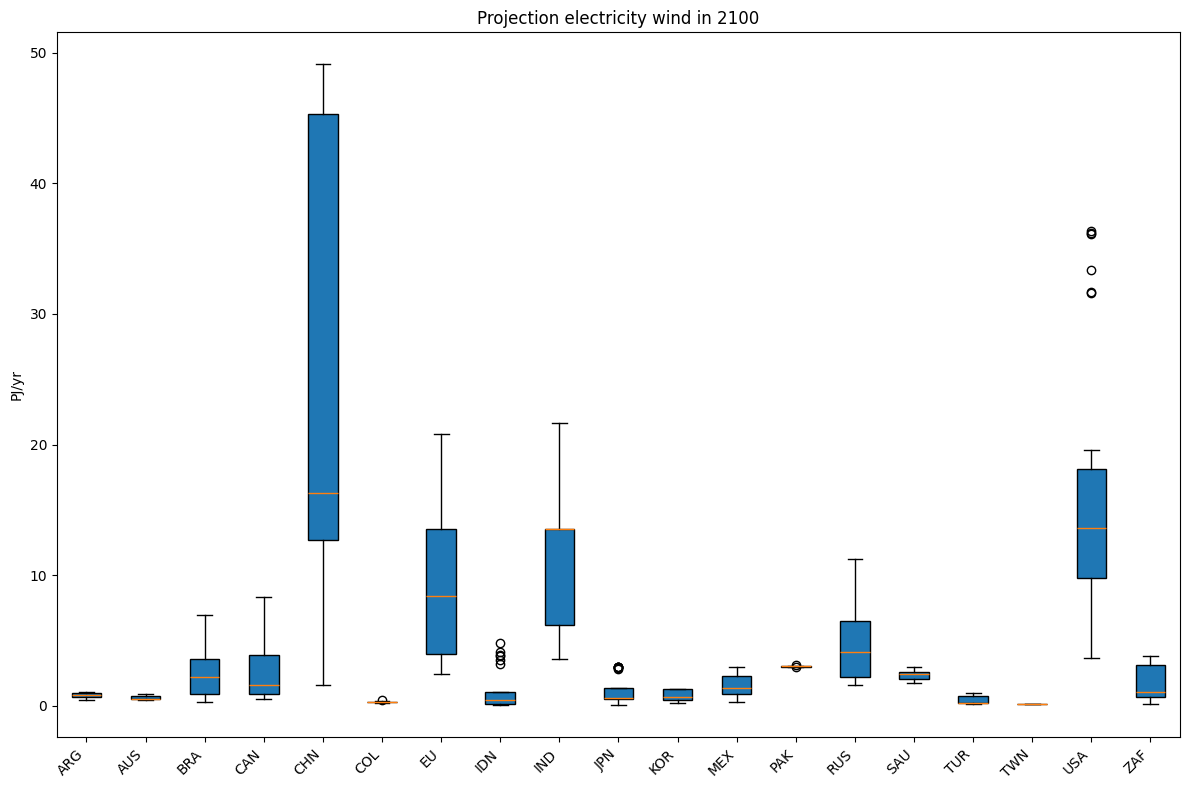

In [364]:
box_plot_energy(df_wind, '2100', category, type = 'wind')

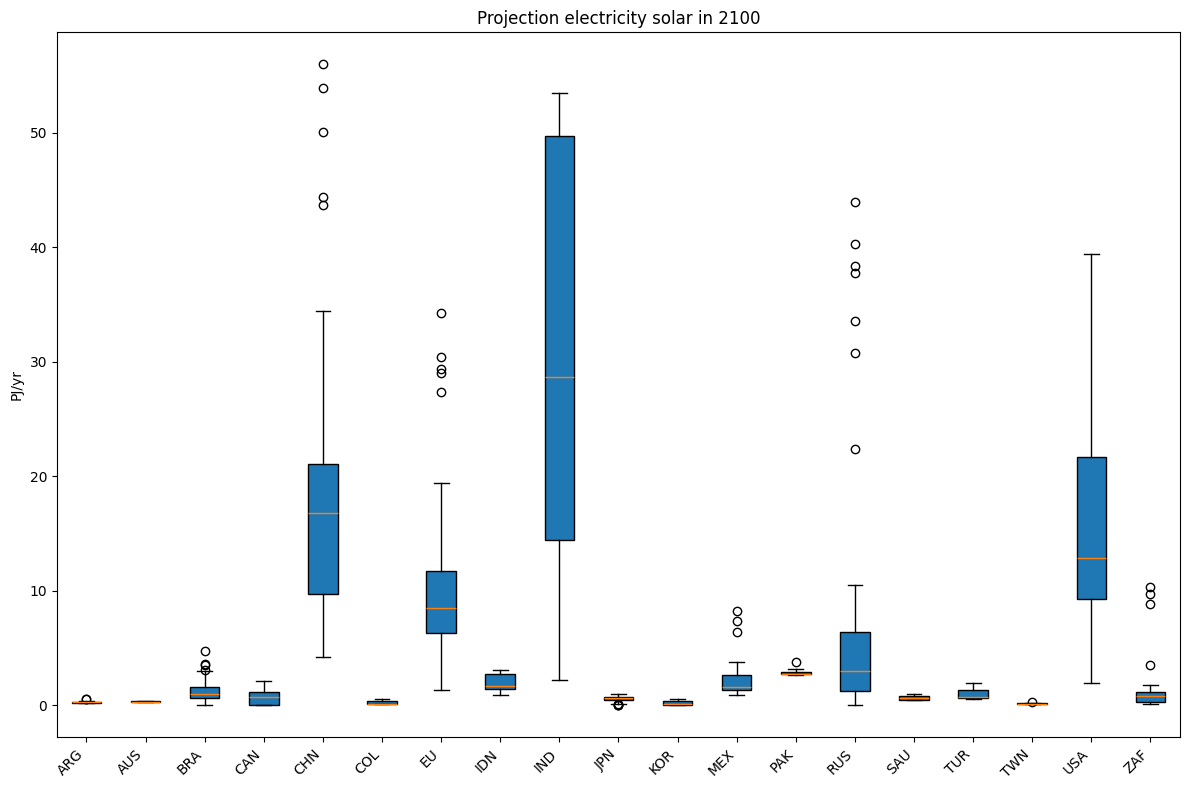

In [361]:
box_plot_energy(df_solar, '2100', category, type = 'solar')

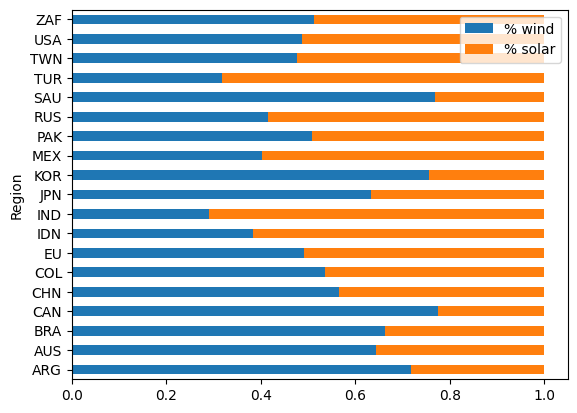

In [365]:
df = pd.merge(stats_2100_solar, stats_2100_wind, on='Region', suffixes=('_solar', '_wind'))

# df = df.drop(df.columns[0], axis = 1)
df['% solar'] = df.iloc[:,1]/(df.iloc[:,1]+df.iloc[:,3])
df['% wind'] = 1-df.iloc[:,1]/(df.iloc[:,1]+df.iloc[:,3])

df[['Region','% wind','% solar']].set_index('Region').plot.barh(stacked=True)
df_pie = df[['Region','% wind','% solar']].set_index('Region')

# 6.Comparaison avec résultats optimisation

On doit déjà grouper les pays par grande région. Pour cela, on a trouvé un tableau qui contient les iso-codes des pays et les continents/régions assoiés.

In [341]:
continents = pd.read_csv('all.csv')
country_codes = pd.read_csv('../countries_codes_and_coordinates.csv' , sep = ',', index_col = 0)
dic_region = {"R10AFRICA" : 'Africa', "R10EUROPE": "Europe", "R10INDIA+": "Southern Asia", "R10LATIN_AM": "Latin America and the Caribbean",
        "R10MIDDLE_EAST" : "Western Asia", "R10NORTH_AM" : 'Northern America', "R10PAC_OECD":'Oceania',
        "R10REST_ASIA" : 'South-eastern Asia', "R10REF_ECON":'Central Asia'

}
dic_invert = {value:key for key, value in dic_region.items()}
dic_invert['Eastern Asia']="R10CHINA+"

In [342]:
data=pd.read_csv('../optim_mix/results/optimization_results_world_grid.csv')
data = data.set_index('Country')
data = data.drop(['Antarctica'], axis =0)
for col in data.columns[2:]: 
    data[f'{col}_normalized']=data[col]/data['mean_load']
    
for c in data.index.to_list(): 
    results = pd.read_pickle(f'../optim_mix/results/{c}/optimization_results.pickle')
    iso_code = country_codes.loc[c,'Alpha-3 code' ].split(' ')[1]
    # data.loc[c, 'capacity_factor_wind'] = results['E_wind']/data.loc[c, 'P_wind']/8760
    # data.loc[c, 'capacity_factor_pv'] = results['E_pv']/data.loc[c, 'P_pv']/8760
    # data.loc[c, 'capacity_factor_dispatch'] = results['E_dispatch']/data.loc[c, 'P_dispatch']/8760
    # # data.loc[c, 'share_dispatchable'] = results['E_dispatch']/(results['E_wind']+results['E_pv'])*100
    data.loc[c, 'share_wind']=results['E_wind']/(results['E_wind']+results['E_pv'])*100
    data.loc[c, 'share_pv']=results['E_pv']/(results['E_wind']+results['E_pv'])*100

In [354]:
for country in data.index :
    country_code = data.at[country, 'iso_alpha']
    if not isinstance(country_code, str):
        country_code = country_code.iloc[0]
    # print(country_code)
    region = continents[continents['alpha-3']==country_code]['region'].iloc[0]
    sub_region = continents[continents['alpha-3']==country_code]['sub-region'].iloc[0]
    # print(sub_region)
    try : 
        if sub_region in dic_invert.keys():
            data.loc[country, 'Region']= dic_invert[sub_region]
        else: 
            data.loc[country, 'Region']= dic_invert[region]
    except Exception as e: 
        print(f'Issue {e}')


# Ajustements à la main
data.loc['Japan','Region']= 'R10PAC_OECD'

Issue nan


### 6.1. Résultats moyennés par grande région à partir de l'optim

<Axes: ylabel='Region'>

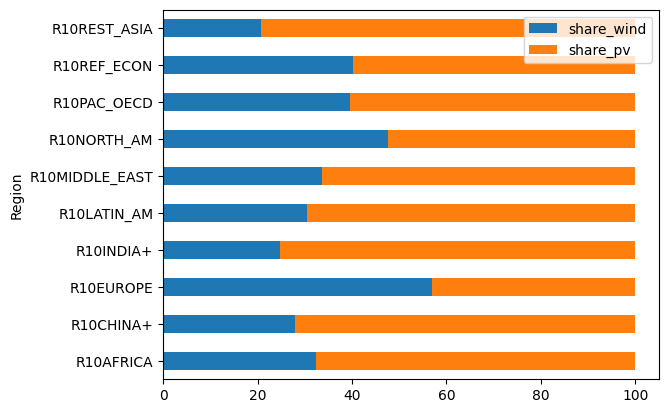

In [355]:
df_bar_plot = data[['share_pv', 'share_wind', 'Region']].groupby('Region').mean()
df_bar_plot[['share_wind','share_pv']].plot.barh(stacked=True)

### 6.2. Résultats moyennés sur les scéanrios de l'AR6

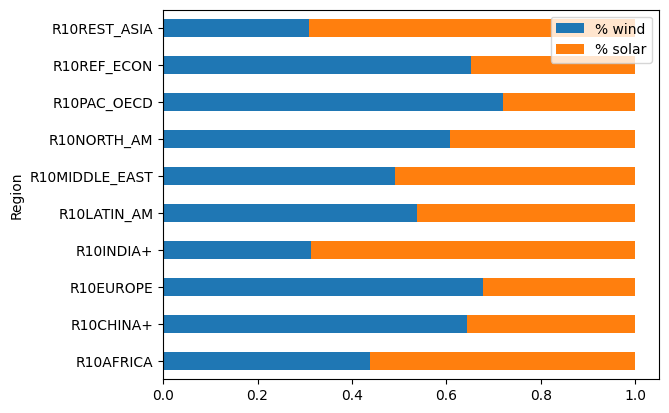

In [352]:
df = pd.merge(stats_2100_solar, stats_2100_wind, on='Region', suffixes=('_solar', '_wind'))
df = df.drop(10, axis = 0)
# df = df.drop(df.columns[0], axis = 1)
df['% solar'] = df.iloc[:,1]/(df.iloc[:,1]+df.iloc[:,3])
df['% wind'] = 1-df.iloc[:,1]/(df.iloc[:,1]+df.iloc[:,3])

df[['Region','% wind','% solar']].set_index('Region').plot.barh(stacked=True)
df_pie = df[['Region','% wind','% solar']].set_index('Region')

### 6.3. Comparaison entre les deux

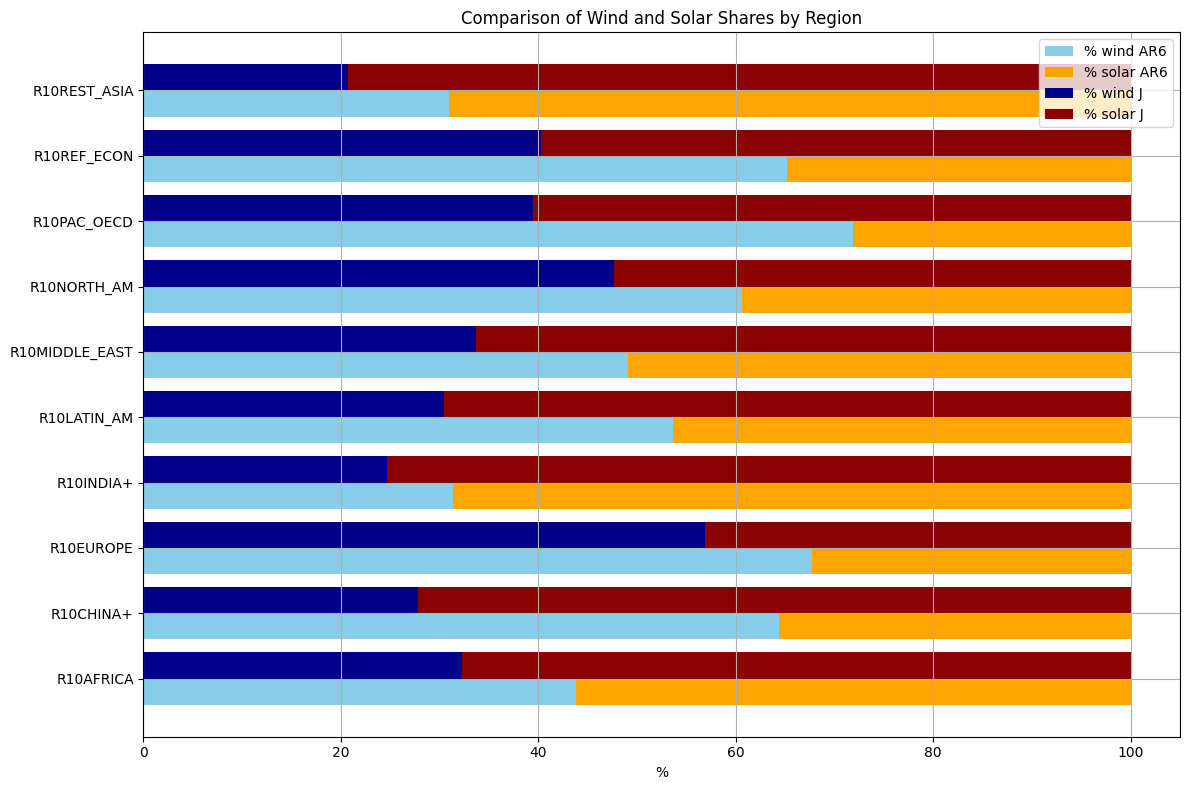

In [356]:
# Number of regions
n = len(df)

# Define the positions for the groups
ind = np.arange(n)

# # Width of the bars
# width = 0.2

# # Create the figure and axis
# fig, ax = plt.subplots(figsize=(12, 8))

# Plot the bars
# bar1 = ax.barh(ind - width, df['% wind']*100, width, label='% wind AR6', color='skyblue')
# bar3 = ax.barh(ind , df_bar_plot['share_wind'], width, label='% wind J', color='darkblue')
# bar2 = ax.barh(ind+ width, df['% solar']*100, width, label='% solar AR6', color='orange')
# bar4 = ax.barh(ind + 2 * width, df_bar_plot['share_pv'], width, label='% solar J', color='darkred')
# Stacked bars

# Width of the bars
width = 0.4

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the stacked bars for percentages
bar1 = ax.barh(ind - width/2, df['% wind']*100, width, label='% wind AR6', color='skyblue')
bar2 = ax.barh(ind - width/2, df['% solar']*100, width, left=df['% wind']*100, label='% solar AR6', color='orange')

# Plot the stacked bars for shares
bar3 = ax.barh(ind + width/2, df_bar_plot['share_wind'], width, label='% wind J', color='darkblue')
bar4 = ax.barh(ind + width/2, df_bar_plot['share_pv'], width, left=df_bar_plot['share_wind'], label='% solar J', color='darkred')

# Add labels, title, and legend
ax.set_xlabel('%')
ax.set_yticks(ind)
ax.set_yticklabels(df_bar_plot.index)
ax.legend()

plt.title('Comparison of Wind and Solar Shares by Region')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

### 6.4. Même chose pour les pays disponibles

In [375]:
df_energy = pd.read_csv('ISO3_enr_projections_AR6_scenarios.csv')
category = 'C1'
df = get_models_category(category, metadata, df_energy)
df_solar, df_wind = get_energy_enr(df)
stats_2100_solar = stats_capacity(df_solar, '2100')
stats_2100_wind = stats_capacity(df_wind, '2100')

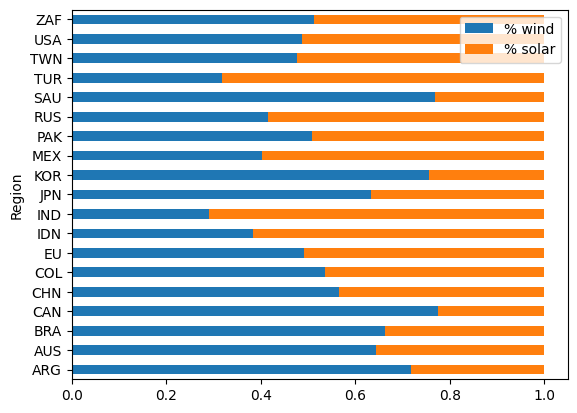

In [383]:
df = pd.merge(stats_2100_solar, stats_2100_wind, on='Region', suffixes=('_solar', '_wind'))

# df = df.drop(df.columns[0], axis = 1)
df['% solar'] = df.iloc[:,1]/(df.iloc[:,1]+df.iloc[:,3])
df['% wind'] = 1-df.iloc[:,1]/(df.iloc[:,1]+df.iloc[:,3])

df[['Region','% wind','% solar']].set_index('Region').plot.barh(stacked=True)
df_pie = df[['Region','% wind','% solar']].set_index('Region')
df_pie = df_pie.drop('EU')

In [390]:
len(data_to_plot)

18

<Axes: ylabel='iso_alpha'>

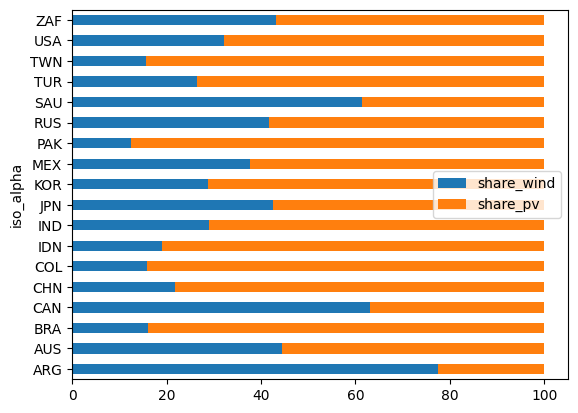

In [391]:
df_pie.index.to_list()
data_to_plot = data[data['iso_alpha'].isin(df_pie.index.to_list())]
data_to_plot = data_to_plot[['share_pv', 'share_wind', 'iso_alpha']].groupby('iso_alpha').mean()
data_to_plot[['share_wind','share_pv']].plot.barh(stacked=True)

18


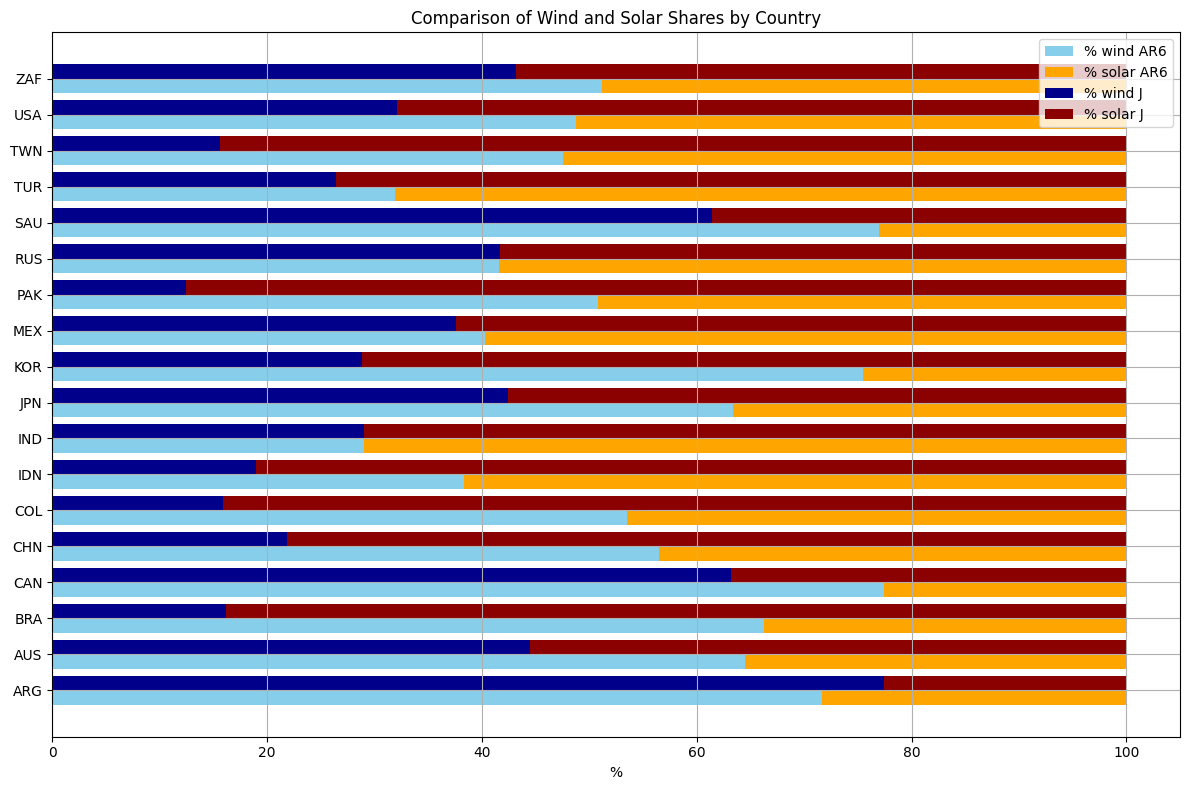

In [395]:
n = len(df_pie)
print(n)

# Define the positions for the groups
ind = np.arange(n)

# Width of the bars
width = 0.4

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the stacked bars for percentages
bar1 = ax.barh(ind - width/2, df_pie['% wind']*100, width, label='% wind AR6', color='skyblue')
bar2 = ax.barh(ind - width/2, df_pie['% solar']*100, width, left=df_pie['% wind']*100, label='% solar AR6', color='orange')

# Plot the stacked bars for shares
bar3 = ax.barh(ind + width/2, data_to_plot['share_wind'], width, label='% wind J', color='darkblue')
bar4 = ax.barh(ind + width/2, data_to_plot['share_pv'], width, left=data_to_plot['share_wind'], label='% solar J', color='darkred')

# Add labels, title, and legend
ax.set_xlabel('%')
ax.set_yticks(ind)
ax.set_yticklabels(data_to_plot.index)
ax.legend()

plt.title('Comparison of Wind and Solar Shares by Country')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

# 7. Tous les scénarios par catégorie